In [1]:
import pandas as pd
from biom import load_table
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

In [2]:
data = pd.read_csv('../data/mice/Group_d_6_11_months_MA.csv', index_col=0)

In [3]:
table = data.iloc[:, 1:]
metadata = data.iloc[:, 0]

In [4]:
table = table.loc[:, table.sum(axis=0)>0]

In [5]:
from sklearn.cross_decomposition import PLSRegression
from skbio.stats.composition import clr, centralize, multiplicative_replacement
ctable = pd.DataFrame(clr(centralize(table+1)),
                      index=table.index, columns=table.columns)

rfc = PLSRegression(n_components=2)
rfc.fit(X=ctable.values, Y=metadata=='d, 6 month')

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

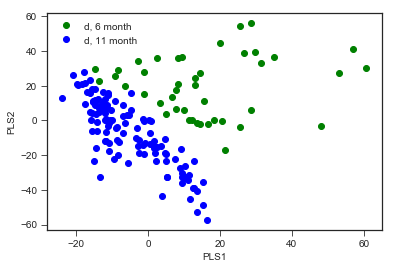

In [6]:
group1 = 'd, 6 month'
group2 = 'd, 11 month'

midx = metadata=='d, 6 month'
lidx = metadata=='d, 11 month'
plt.plot(rfc.x_scores_[midx, 0], rfc.x_scores_[midx, 1], 'og', label=group1)
plt.plot(rfc.x_scores_[lidx, 0], rfc.x_scores_[lidx, 1], 'ob', label=group2)
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()

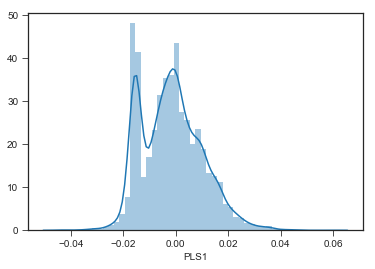

In [7]:
rfc = PLSRegression(n_components=1)
rfc.fit(X=ctable.values, Y=metadata=='d, 6 month')
pls_df = pd.DataFrame(rfc.x_weights_, index=ctable.columns, columns=['PLS1'])
sns.distplot(pls_df.PLS1)

In [8]:
from sklearn.mixture import GaussianMixture
gmod = GaussianMixture(n_components=3, 
                       means_init=[[-0.02], [0], [0.02]])
gmod = GaussianMixture(n_components=3)
gmod.fit(X=pls_df.values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
from src.balances import round_balance
l, r = round_balance(pls_df.values)

ImportError: No module named 'src'